<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff
from sympy import symbols
import sympy as sp
from scipy import optimize
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
import pandas as pd
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy import misc
import sympy as sy


#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





In [2]:
# Valores de tiempo y corriente

d = "https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo"
datos = pd.read_csv(d, sep = ",")
df = datos.drop(columns=["Unnamed: 0"])
df.rename(columns = {'tiempo':'Tiempo'}, inplace = True)
df

,Corriente,Tiempo
0,0.000000,0.00000
1,0.014533,0.10101
2,0.028854,0.20202
3,0.042967,0.30303
4,0.056875,0.40404
...,...,...
95,0.751104,9.59596
96,0.754721,9.69697
97,0.758285,9.79798
98,0.761798,9.89899


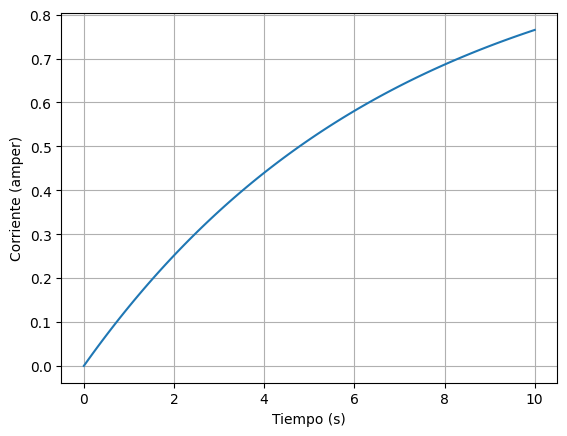

In [3]:
plt.plot(df["Tiempo"], df["Corriente"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (amper)")
plt.grid()

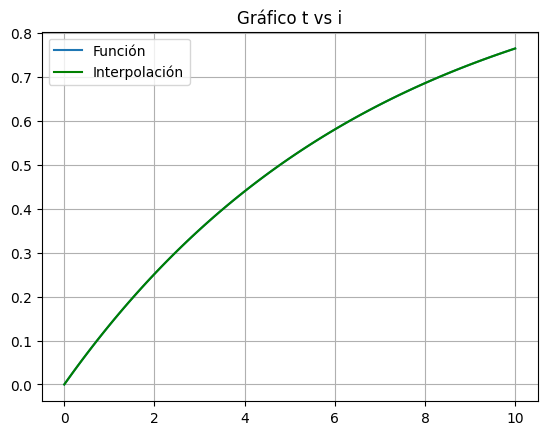

In [4]:
# Interpolacion CubicSpline

interpolacion = CubicSpline(df["Tiempo"], df["Corriente"])

plt.plot(df["Tiempo"], df["Corriente"], label = "Función")
plt.plot(df["Tiempo"], interpolacion(df["Tiempo"]), "g-", label = "Interpolación")
plt.title("Gráfico t vs i")
plt.legend()
plt.grid()

In [5]:
d = misc.derivative(interpolacion, df["Tiempo"], dx = 1)

<ipython-input-5-2b12ef4bdd05>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d = misc.derivative(interpolacion, df["Tiempo"], dx = 1)


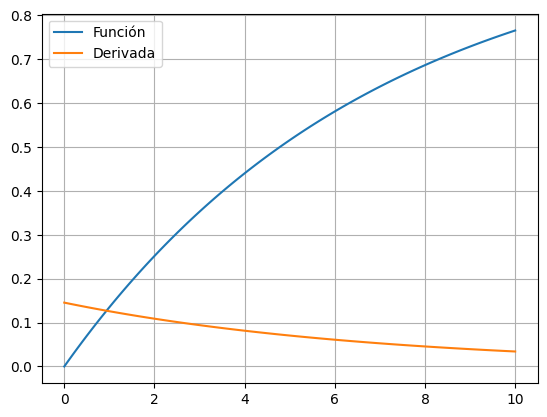

In [6]:
plt.plot(df["Tiempo"], df["Corriente"], label = "Función")
plt.plot(df["Tiempo"], d, label = "Derivada")
plt.legend()
plt.grid()

In [7]:
def voltaje(d):
  L = 0.98 # Herios
  R = 0.142 # ohms
  i = df["Corriente"]
  funcion = L*d + R*i # d es derivada de corriente con respecto del tiempo

  return funcion

voltaje(d)

0     0.142512
1     0.142509
2     0.142505
3     0.142500
4     0.142494
        ...   
95    0.142132
96    0.142130
97    0.142129
98    0.142128
99    0.142127
Name: Corriente, Length: 100, dtype: float64




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

## **Codigo Markdown**

## 1. Cálculo de una integral con la regla del trapecio

La regla del trapecio es un método numérico utilizado para aproximar el valor de una integral definida. Consiste en aproximar el área bajo la curva de una función utilizando trapecios.

\begin{equation}
\int_a^b f(x) \, dx \approx \frac{h}{2} \left( f(a) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(b) \right)
\end{equation}

donde:
 - $h$ es el tamaño del intervalo: $h = \frac{b - a}{n}$
 - $n$ es el número de subintervalos 
 - $x_i$ son los puntos dentro de cada subintervalo.

El procedimiento general para calcular una integral con la regla del trapecio es el siguiente:

1. Dividir el intervalo de integración en subintervalos de igual tamaño.
2. Calcular el ancho de cada subintervalo: $h = (b - a) / n$, donde '$a$' y '$b$' son los límites de integración y 'n' es el número de subintervalos.
3. Evaluar la función en los puntos extremos de cada subintervalo.
4. Calcular el área del trapecio para cada subintervalo: $A = (f(x_i) + f(x_i+1)) * h / 2$, donde $f(x_i)$ y $f(x_i+1)$ son los valores de la función en los extremos del subintervalo y $h$ es el ancho del subintervalo.
5. Sumar las áreas de todos los trapecios para obtener una aproximación de la integral: $I ≈ (A_1 + A_2 + ... + A_n)$.

Es importante tener en cuenta que la precisión de la aproximación aumenta a medida que se utiliza un mayor número de subintervalos.



## 2. Cálculo de una integral con la regla del Simpson

La regla del Simpson es un método numérico utilizado para aproximar el valor de una integral definida. Este método se basa en la interpolación de una función mediante polinomios de segundo grado.

\begin{equation}
\int_a^b f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right)
\end{equation}

donde:
- $h$ es el tamaño del intervalo: $h = \frac{b - a}{n}$.
- $n$ es el número de subintervalos y debe ser un número par.
- $x_i$ son los puntos dentro de cada subintervalo, y se calculan como $x_i = a + i \cdot h$ para $i = 0, 1, 2, \ldots, n$.

El procedimiento general para calcular una integral con la regla del Simpson es el siguiente:

1. Dividir el intervalo de integración en subintervalos de igual tamaño.
2. Calcular el ancho de cada subintervalo: $h = (b - a) / n$, donde '$a$' y '$b$' son los límites de integración y '$n$' es el número de subintervalos.
3. Evaluar la función en los puntos extremos de cada subintervalo y en el punto medio.
4. Calcular el área del polinomio de segundo grado que pasa por estos tres puntos.
5. Sumar las áreas de todos los polinomios para obtener una aproximación de la integral: $I ≈ (A_1 + A_2 + ... + A_n)$.

Es importante destacar que se necesita un número par de subintervalos para aplicar correctamente la regla del Simpson.

## 3. Cálculo de una integral con el método de cuadratura

El método de cuadratura es una técnica numérica utilizada para calcular aproximaciones de integrales definidas. Este método se basa en la aproximación de una función mediante una fórmula que involucra una suma ponderada de los valores de la función en puntos específicos.


\begin{equation}
\int_a^b f(x) \, dx \approx \sum_{i=1}^n w_i f(x_i)
\end{equation}

donde:
- $n$ es el número de puntos de cuadratura.
- $w_i$ son los pesos asociados a cada punto de cuadratura.
- $x_i$ son los puntos de cuadratura.

El procedimiento general para calcular una integral con el método de cuadratura es el siguiente:

1. Selección de una fórmula de cuadratura adecuada para el problema. Algunas fórmulas comunes incluyen la regla del trapecio, la regla de Simpson y la regla de Gauss.
2. División del intervalo de integración en subintervalos de igual tamaño (si es necesario).
3. Evaluación de la función en los puntos de evaluación especificados por la fórmula de cuadratura.
4. Cálculo de los pesos asociados a cada punto de evaluación.
5. Suma ponderada de los valores de la función multiplicados por los pesos correspondientes.
6. Obtención de una aproximación de la integral.

In [8]:
#@title Ejemplo Profe

In [9]:
f = lambda x: 1/ (sp.tan(x)) ** (1/2) 

x = symbols("x")

fp2 = sp.diff(f(x), x, 2)

fp2

(0.75*(tan(x)**2 + 1)/tan(x)**2.5 - 1.0/tan(x)**0.5)*(tan(x)**2 + 1)

In [10]:
def f(x1):
  return 1 / np.sqrt(np.tan(x1))

e = 0.0001
x1 = np.linspace(e, (np.pi/2)-e, 1000)

In [11]:
N= 100
epsilon = 1E-4

@np.vectorize   

def integral_trapz(N, epsilon):

  x = np.linspace(0+epsilon, np.pi/2-epsilon,N)
  area = integrate.trapz(f(x),x)

  return area

In [12]:
ep = np.linspace(1E-6, 1E-3,100)

#T = integral_trapz(N,ep)

In [13]:
t1 = integral_trapz(100,ep)
t2 = integral_trapz(500,ep)

In [14]:
#plt.plot(T, label="")
#plt.grid()

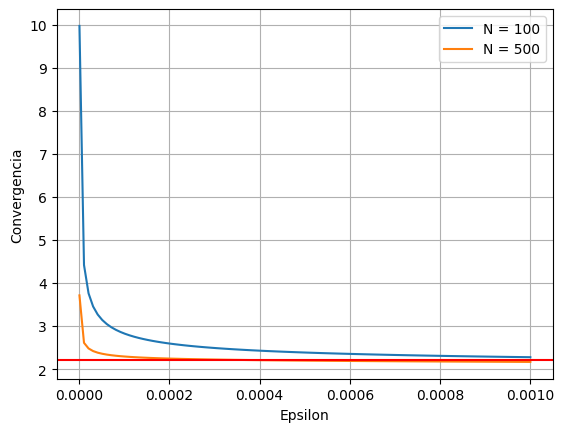

In [15]:
plt.plot(ep, t1, label="N = 100")
plt.plot(ep, t2, label="N = 500")

plt.xlabel("Epsilon")
plt.ylabel("Convergencia")
plt.legend()
plt.grid()

plt.axhline(2.22, color="red")

In [16]:
#La idea es optimizar y saber que N elegir y que epsilon elegir 
#Para eso es bueno graficar y ver com se comporta la convergencia de la funcion

In [17]:
epsilon=0.000001
N = 10000000
x= np.linspace(0+epsilon,(np.pi/2-epsilon), N)
f = lambda x: 1/ np.sqrt(np.tan(x)) 
f = lambda x: 1/ (np.tan(x))**(1./2) 

In [18]:
integrate.simpson(f(x),x)

2.2194415740147226

In [19]:
integrate.trapz(f(x),x)

2.219442494921794

In [20]:
integrate.quadrature(f,0,np.pi/2)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.364547e-04
  warnings.warn(


(2.1998340191412136, 0.0004364547329926971)

In [21]:
integrate.quad(f,0,np.pi/2)

(2.2214414690792026, 4.1406478246130973e-10)

In [22]:
#ERROR de la tangente (no va)

In [23]:
f = lambda x: 1/ (sp.tan(x)) ** (1/2) 

x = symbols("x")

fp2 = sp.diff(f(x), x, 2)

fp2

(0.75*(tan(x)**2 + 1)/tan(x)**2.5 - 1.0/tan(x)**0.5)*(tan(x)**2 + 1)

In [24]:
fp2r = sp.lambdify(x, fp2, "numpy")

In [25]:
#optimizar la derivada

In [26]:
fp = optimize.fmin_powell(fp2r, 2, ftol = 1e-7)

Optimization terminated successfully.
         Current function value: 0.608659
         Iterations: 2
         Function evaluations: 25


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in power
  return (0.75*(tan(x)**2 + 1)*tan(x)**(-2.5) - 1.0*tan(x)**(-0.5))*(tan(x)**2 + 1)


In [27]:
x_ = np.linspace(0+0.0001,np.pi/2-0.0001)

In [28]:
max = np.max(fp2r(x_))
max

7499999987.500001

In [29]:
#@title $Función$ 01

 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [30]:
def f_tan(x):

  f = 1 / np.sqrt(np.tan(x))

  return f

In [31]:
int1_trapz = integrate.trapz(f_tan(x_),x_)
print("La integral por el método del trapecio es:", int1_trapz)

int1_simp = integrate.simpson(f_tan(x_),x_)
print("La integral por el método del Simpson es:", int1_simp)

int1_quad = integrate.quad(f_tan, 0 , np.pi/2)
print("La integral por el método del cuadratura es:", int1_quad[0], "con un error de:", int1_quad[1])

La integral por el método del trapecio es: 3.5608647563856635
La integral por el método del Simpson es: 3.309102538893427
La integral por el método del cuadratura es: 2.2214414690792026 con un error de: 4.1406478246130973e-10


In [32]:
#Funcion logaritmo, calculo del error

In [41]:
#@title $Función$ 02

$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [77]:
a=0
b=1

def f(x):
  return np.log(1 + x**2)

epsilon = 0.001

In [64]:
f = lambda x: sp.log(1+ x**2)

x = symbols("x")

fprima = sp.diff(f(x), x, 2)
fpri = sp.lambdify(x, -fprima, "numpy")

fprima

2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)

In [66]:
# Se optimiza la función (mínimo de la función)

f_ = sy.lambdify(x, f(x), "numpy")
f_op = optimize.fmin_powell(fpri, 2, ftol = 1e-7)
f_op

<ipython-input-66-9aec5941b536>:4: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  f_op = optimize.fmin_powell(fpri, 2, ftol = 1e-7)


array([2])

In [69]:
x_ = np.linspace(-1,1,100)
max = np.max(fpri(x_))
max

-0.0

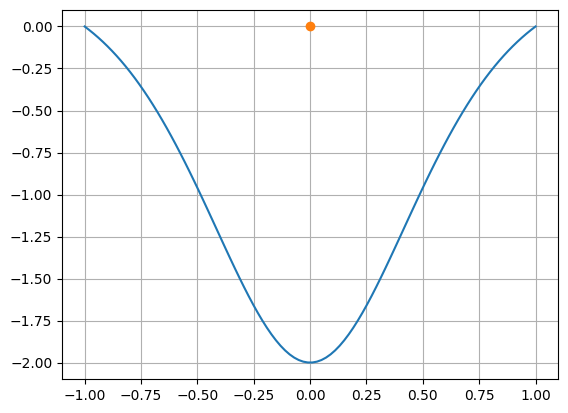

In [70]:
plt.plot(x_,fpri(x_))
plt.grid()
plt.plot(0,max,"o")

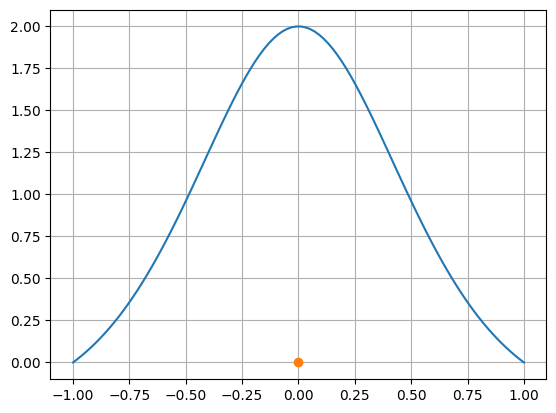

In [72]:
x = np.linspace(-1, 1, 100)
plt.plot(x, -fpri(x))
plt.plot(0, max, "o")
plt.grid()

In [36]:
fp = optimize.fmin_powell(fpri, 2, ftol = 1e-7)
print(fp)

[2]


<ipython-input-36-4c308da78ec5>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  fp = optimize.fmin_powell(fpri, 2, ftol = 1e-7)


In [73]:
error = ((1-0) / 12) * max
error

-0.0

In [74]:
h2 = 0.001 / error
h2

<ipython-input-74-7f24741f99ba>:1: RuntimeWarning: divide by zero encountered in double_scalars
  h2 = 0.001 / error


-inf

In [75]:
 #tamaño de cada paso
h = 0.006 ** (1/2) 
h

0.07745966692414834

In [78]:
#numero de intervalos

n = (b-a) / h
n

12.909944487358056

In [81]:
print("El tamaño de cada paso es ", h)

El tamaño de cada paso es  0.07745966692414834


In [80]:
print("El número de ntervalos es",n)

El número de ntervalos es 12.909944487358056


In [42]:
#@title $Función$ 2

In [43]:
x1 = np.linspace(-50,50,1000000)

f1 = lambda x: 1 / (1 + (x**2))

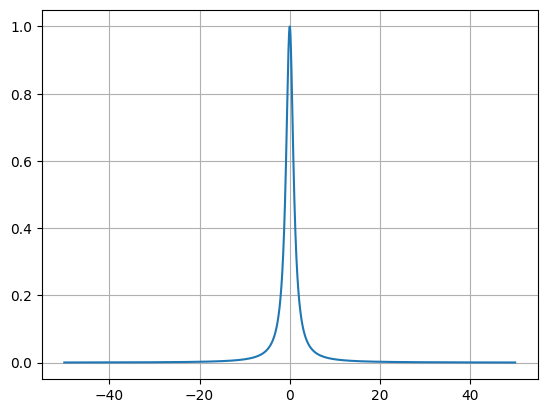

In [44]:
plt.plot(x1,f1(x1))
plt.grid()

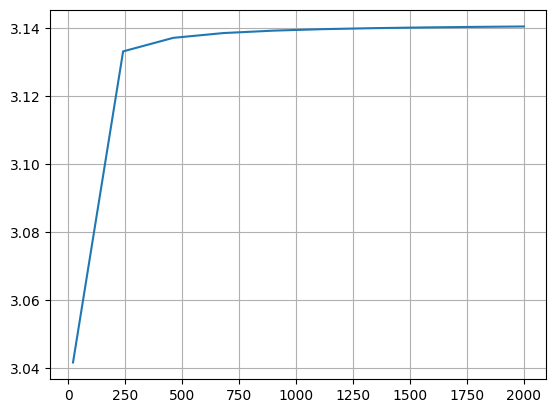

In [45]:
f1 = lambda x: 1 / (1 + (x**2))
a = np.linspace(20,2000,10)


area=[]

for a_ in a:
  x_ = np.linspace(-a_,a_,100000)
  area.append(integrate.trapz(f1(x_),x_))


plt.plot(a, np.array(area))
plt.grid()

In [46]:
x2 = np.linspace(1000,2000,10)

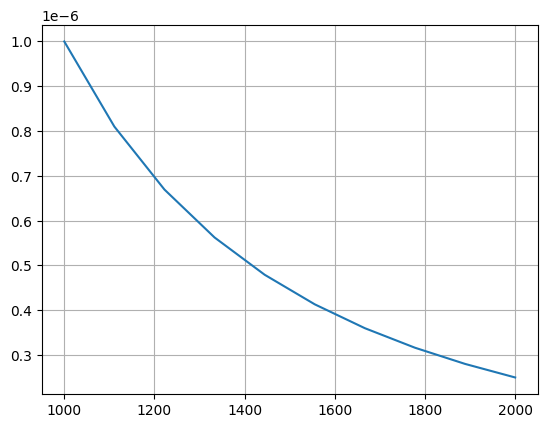

In [47]:
plt.plot(x2,f1(x2))
plt.grid()

In [48]:
integrate.simpson(f1(x2),x2)

0.0005003163225051435

In [49]:
integrate.trapz(f1(x2),x2)

0.0005017952378342783

In [50]:
integrate.quad(f1, -1000 , 6000)

(3.140425987258003, 1.5379713953116506e-09)

In [51]:
int1_trapz = integrate.trapz(f1(x2),x2)
print("La integral por el método del trapecio es:", int1_trapz)

int1_simp = integrate.simpson(f1(x2),x2)
print("La integral por el método del Simpson es:", int1_simp)

int1_quad = integrate.quad(f1, -1000 , 6000)
print("La integral por el método del cuadratura es:", int1_quad[0], "con un error de:", int1_quad[1])

La integral por el método del trapecio es: 0.0005017952378342783
La integral por el método del Simpson es: 0.0005003163225051435
La integral por el método del cuadratura es: 3.140425987258003 con un error de: 1.5379713953116506e-09


In [85]:
#@title $Función$ 3

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dydx
 $$

In [89]:
x = np.linspace(0, np.pi/4,100)

def g(y):

  return (2*y*np.sin(x) + np.cos(2*x)**2)

In [91]:
integral_t = np.zeros_like(x)
integral_s = np.zeros_like(x)

for i in range(len(x)):

  y = np.linspace(np.sin(x[i]), np.cos(x[i]), 100)

  integral_t[i] = trapz(g(y), y)
  integral_s[i] = simpson(g(y), y)

# Integramos la función resultante en x
integralt = trapz(integral_t, x)
integrals = simpson(integral_s, x)

# Para el método de cuadratura

def f3(y, x):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

def int_q(x):
  return quad(f3, np.sin(x), np.cos(x), args=(x))[0]

integralq, error= quad(int_q, a, b)

In [92]:
print("Método trapecio:", integralt)
print("Método simpson:", integrals)
print('Método cuadratura:',integralq, 'y su error de:', error)

Método trapecio: 0.427555799166781
Método simpson: 0.42755386004751816
Método cuadratura: 0.3865328186338593 y su error de: 5.153642571727155e-15


5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->


7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [93]:
#@title $Problema$ 05

In [94]:
k = lambda x, m: 1/np.sqrt(1 - m*np.sin(x)**2)

a = 0
b = np.pi/2
eps = 3e-5

def eliptica(m):

  m1 = 1 - m
  a0,b0 = 1.3862944, 0.5
  a1,b1 = 0.1119723, 0.1213478
  a2,b2 = 0.00725296, 0.0288729

  i= lambda x: k(x, m)

  integral, error = quad(i, a, b)

  polin = a0 + a1*m1 + a2*m1- (b0 + b1*m1 + b2*m1**2)*np.log(m1)+error

  if error <= eps and 0<= m <= 1:

    print('El valor de integral', integral, 'y el valor de la aproximación polinomial es de:', polin)

    print('La diferencia entre la aproximación y el resultado de la integral es de:', np.abs(polin-integral))

    print('El ϵ(m) es de:', error)

  else:
    print('Error, ingrese un número entre el intervalo dado')

m=float(input('Ingrese un número entre 0 y 1: '))

eliptica(m)

Ingrese un número entre 0 y 1: 0.55
El valor de integral 1.8989249102715537 y el valor de la aproximación polinomial es de: 1.8874720182698836
La diferencia entre la aproximación y el resultado de la integral es de: 0.0114528920016701
El ϵ(m) es de: 7.824738633134817e-12


In [95]:
#@title $Problema$ 06

In [96]:
# Parámetros
a = 1.0
I = 3.0
mu_0 = 1

# Funciones de integración
def K(phi, k_squared):
    return 1 / np.sqrt(1 - k_squared * np.sin(phi)**2)

def E(phi, k_squared):
    return np.sqrt(1 - k_squared * np.sin(phi)**2)

# Función para calcular Aϕ(r, θ)
def calcular_Aphi(r, theta):
  k_squared = (4 * a * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

  # Cálculo de la integral K(k)
  k_i, error_k = quad(K, 0, np.pi / 2, args=(k_squared,))

  # Cálculo de la integral E(k)
  e_i, error_e = quad(E, 0, np.pi / 2, args=(k_squared,))

  A_phi = (mu_0) * (4*I * a / np.sqrt((a**2 + r**2 + 2 * a * r * np.sin(theta))))*((2 - k_squared) * k_i - 2 * e_i * k_squared)
  return A_phi

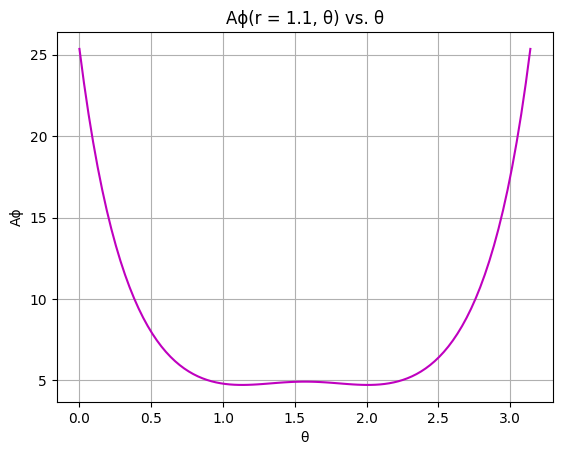

In [101]:
r_value = 1.1
theta_values = np.linspace(0, np.pi, 100)
A_phi_values = [calcular_Aphi(r_value, theta) for theta in theta_values]

plt.plot(theta_values, A_phi_values, 'm')
plt.xlabel('θ')
plt.ylabel('Aϕ')
plt.title('Aϕ(r = 1.1, θ) vs. θ')
plt.grid()
plt.show()

<ipython-input-96-08198d3abc4a>:8: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - k_squared * np.sin(phi)**2)
<ipython-input-96-08198d3abc4a>:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  k_i, error_k = quad(K, 0, np.pi / 2, args=(k_squared,))
<ipython-input-96-08198d3abc4a>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - k_squared * np.sin(phi)**2)
<ipython-input-96-08198d3abc4a>:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  e_i, error_e = quad(E, 0, np.pi / 2, args=(k_squared,))


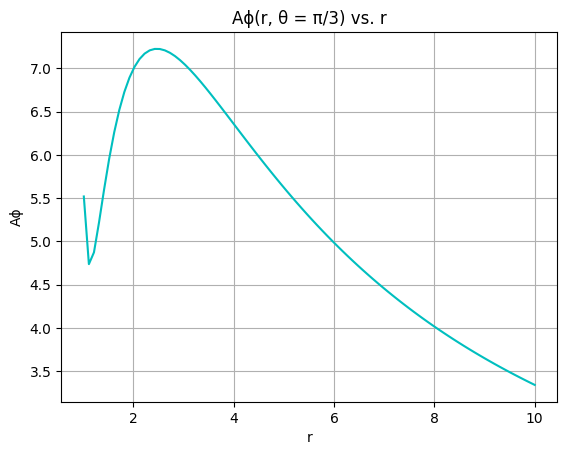

In [100]:
theta_value = np.pi / 3
r_values = np.linspace(0, 10, 100)
A_phi_values = [calcular_Aphi(r, theta_value) for r in r_values]

plt.plot(r_values, A_phi_values, 'c')
plt.xlabel('r')
plt.ylabel('Aϕ')
plt.title('Aϕ(r, θ = π/3) vs. r')
plt.grid()
plt.show()